 # Association Rules

Import dependencies

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

Tronsform data into binary format for machine understanding

In [9]:
def preprocess_data(data):
    TE = TransactionEncoder()
    pr_arr =TE.fit(data.products).transform(data.products)
    data_clean = pd.DataFrame(pr_arr,columns=TE.columns_)
    return data_clean.astype(int)

apply apriori algorithm to find frequent items with minimum support 0.01

In [10]:
def frequent_itemsets(data_clean): 
    frequent_itemsets = apriori(data_clean,use_colnames=True,min_support=0.01)
    return frequent_itemsets

Apply association rules algorithm

In [11]:
def association(frequent_itemsets):
    rules = association_rules(frequent_itemsets, min_threshold=0.2)
    return rules.sort_values('lift',ascending = False).drop_duplicates(subset=['antecedent support','consequent support','support','confidence','lift',
                                                                   'leverage','conviction','zhangs_metric'], keep='first')

Avoid or Ignor wornings

In [12]:
warnings.filterwarnings('ignore')

Read dataset

In [13]:
data = pd.read_excel('Online retail.xlsx',names=['products'],header=None)
data.head()

,products
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [14]:
data.shape

(7501, 1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   products  7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


Make product list for each transaction

In [16]:
data.products = data.products.apply(lambda x:x.split(','))

In [17]:
data.head()

,products
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."


Find the duplicates and rwmove its, because its not going to help to make association rules.

In [18]:
data.duplicated().value_counts()

False    5176
True     2325
Name: count, dtype: int64

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.duplicated().value_counts()

False    5176
Name: count, dtype: int64

Remove those transactions which contain only one item , because its not going to help to make association rules.

In [21]:
data = data[data['products'].apply(lambda x: len(x) > 1)]

In [22]:
data.shape

(5066, 1)

In [23]:
data['products'].value_counts()

products
[shrimp, almonds, avocado, vegetables mix, green grapes, whole weat flour, yams, cottage cheese, energy drink, tomato juice, low fat yogurt, green tea, honey, salad, mineral water, salmon, antioxydant juice, frozen smoothie, spinach, olive oil]    1
[frozen vegetables, soup]                                                                                                                                                                                                                               1
[ham, tomatoes, spaghetti, whole wheat rice, blueberries, french fries]                                                                                                                                                                                 1
[herb & pepper, spaghetti, olive oil, low fat yogurt]                                                                                                                                                                                            

In [24]:
data.head()

,products
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."
6,"[whole wheat pasta, french fries]"


### Apply the algorithm

Transfoem data into machine readable format

In [25]:
data_clean = preprocess_data(data)

In [26]:
data_clean.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


apply apriori algorithm

In [27]:
frequent_items = frequent_itemsets(data_clean)
frequent_items

,support,itemsets
0,0.029807,(almonds)
1,0.011251,(antioxydant juice)
2,0.046782,(avocado)
3,0.012633,(bacon)
4,0.015594,(barbecue sauce)
...,...,...
444,0.015002,"(mineral water, olive oil, spaghetti)"
445,0.016976,"(mineral water, spaghetti, pancakes)"
446,0.012633,"(mineral water, shrimp, spaghetti)"
447,0.011054,"(mineral water, spaghetti, soup)"


Apply association rules algorithm

In [28]:
association(frequent_items)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
177,(whole wheat pasta),(olive oil),0.041255,0.089420,0.011251,0.272727,3.049970,0.007562,1.252048,0.701050
127,(herb & pepper),(ground beef),0.067706,0.138571,0.023293,0.344023,2.482653,0.013910,1.313201,0.640576
320,"(mineral water, shrimp)",(frozen vegetables),0.034347,0.132452,0.010659,0.310345,2.343080,0.006110,1.257945,0.593600
313,"(spaghetti, frozen vegetables)",(ground beef),0.039874,0.138571,0.012831,0.321782,2.322149,0.007305,1.270136,0.593010
352,"(milk, spaghetti)",(olive oil),0.051125,0.089420,0.010462,0.204633,2.288459,0.005890,1.144856,0.593360
...,...,...,...,...,...,...,...,...,...,...
103,(french fries),(spaghetti),0.196605,0.234307,0.040663,0.206827,0.882719,-0.005403,0.965355,-0.141909
224,"(french fries, chocolate)",(mineral water),0.046980,0.306159,0.012633,0.268908,0.878327,-0.001750,0.949047,-0.126909
124,(green tea),(mineral water),0.172720,0.306159,0.044216,0.256000,0.836168,-0.008663,0.932582,-0.191488
101,(french fries),(mineral water),0.196605,0.306159,0.048954,0.248996,0.813291,-0.011238,0.923885,-0.222246


Remove those frequent items and infrequent items because its not going to help to make better association rules.

In [29]:
min_support = 0.005
min_support_count = min_support*len(data)
print(min_support_count)
item_counts = {}
for transaction in data['products']:
    for item in transaction:
        if item in item_counts:
            item_counts[item] += 1
        else:
            item_counts[item] = 1
infrequent_items = [item for item, count in item_counts.items() if count >= 1000 or count < min_support_count]
infrequent_items

25.330000000000002


['mineral water',
 'eggs',
 'spaghetti',
 'chocolate',
 'water spray',
 'bramble',
 ' asparagus',
 'cream',
 'napkins']

In [30]:
item_counts

{'shrimp': 511,
 'almonds': 151,
 'avocado': 237,
 'vegetables mix': 173,
 'green grapes': 67,
 'whole weat flour': 67,
 'yams': 78,
 'cottage cheese': 222,
 'energy drink': 161,
 'tomato juice': 218,
 'low fat yogurt': 491,
 'green tea': 875,
 'honey': 337,
 'salad': 34,
 'mineral water': 1551,
 'salmon': 297,
 'antioxydant juice': 57,
 'frozen smoothie': 438,
 'spinach': 51,
 'olive oil': 453,
 'burgers': 588,
 'meatballs': 146,
 'eggs': 1076,
 'turkey': 430,
 'milk': 879,
 'energy bar': 169,
 'whole wheat rice': 402,
 'whole wheat pasta': 209,
 'french fries': 996,
 'soup': 366,
 'light cream': 115,
 'shallot': 52,
 'frozen vegetables': 671,
 'spaghetti': 1187,
 'pet food': 44,
 'cooking oil': 371,
 'champagne': 283,
 'cookies': 313,
 'chocolate': 1062,
 'chicken': 433,
 'oil': 161,
 'fresh tuna': 159,
 'tomatoes': 475,
 'black tea': 105,
 'extra dark chocolate': 87,
 'protein bar': 127,
 'red wine': 199,
 'pasta': 89,
 'pepper': 192,
 'shampoo': 37,
 'rice': 137,
 'sparkling water'

check the distribution of items count

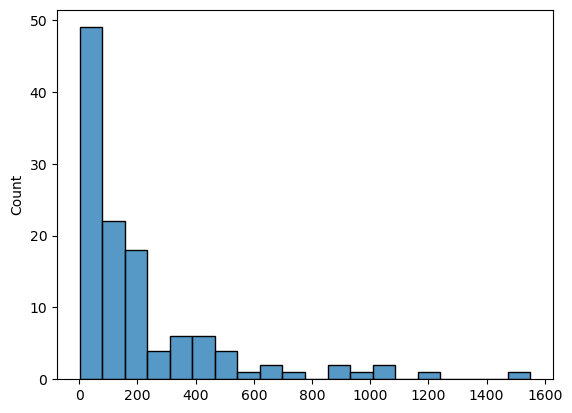

In [31]:
sns.histplot([value for key , value in item_counts.items() if value < 800 or value > 57 ]) 
plt.show()

In [32]:
data_clean.drop(columns=infrequent_items,inplace=True)


apply apriori algorithm

In [33]:
frequent_items = frequent_itemsets(data_clean)
frequent_items

,support,itemsets
0,0.029807,(almonds)
1,0.011251,(antioxydant juice)
2,0.046782,(avocado)
3,0.012633,(bacon)
4,0.015594,(barbecue sauce)
...,...,...
230,0.013818,"(turkey, pancakes)"
231,0.010265,"(pancakes, whole wheat rice)"
232,0.015989,"(shrimp, tomatoes)"
233,0.010265,"(soup, tomatoes)"


Apply association rules algorithm

In [34]:
association(frequent_items)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
49,(whole wheat pasta),(olive oil),0.041255,0.089420,0.011251,0.272727,3.049970,0.007562,1.252048,0.701050
37,(herb & pepper),(ground beef),0.067706,0.138571,0.023293,0.344023,2.482653,0.013910,1.313201,0.640576
47,(whole wheat pasta),(milk),0.041255,0.173510,0.014212,0.344498,1.985466,0.007054,1.260850,0.517698
33,(tomatoes),(frozen vegetables),0.093762,0.132452,0.023095,0.246316,1.859666,0.010676,1.151077,0.510097
32,(shrimp),(frozen vegetables),0.100869,0.132452,0.024280,0.240705,1.817301,0.010919,1.142570,0.500187
45,(soup),(milk),0.072246,0.173510,0.021911,0.303279,1.747907,0.009375,1.186257,0.461208
34,(grated cheese),(ground beef),0.071457,0.138571,0.016779,0.234807,1.694488,0.006877,1.125767,0.441392
39,(olive oil),(ground beef),0.089420,0.138571,0.020726,0.231788,1.672704,0.008335,1.121343,0.441659
8,(cereals),(milk),0.036913,0.173510,0.010462,0.283422,1.633468,0.004057,1.153386,0.402669
40,(salmon),(ground beef),0.058626,0.138571,0.013225,0.225589,1.627970,0.005102,1.112367,0.409761


Here are some insights :

Highest Lift: The highest lift (3.04) is observed between "whole wheat pasta" and "olive oil." This indicates that when customers buy "whole wheat pasta," they are much more likely to also buy "olive oil" compared to random chance. This strong association suggests that these products are often bought together.

Frequent Products: Products like "eggs," "mineral water," "spaghetti," and "chocolate" are frequently bought together with other items. Their frequent occurrence in transactions suggests that these are popular products and may serve as staples in customer baskets.

Infrequent Products: Products such as "water spray," "bramble," "asparagus," "cream," and "napkins" are infrequent. These items are not often bought together with other products and could be niche or specialized products.

Market Basket Suggestions:

Cross-Selling Opportunities: The strong association between "whole wheat pasta" and "olive oil" suggests a potential cross-selling opportunity. Promotions or bundling these items together could increase sales.
Product Placement: Since "milk" has associations with several other items (e.g., "soup," "whole wheat pasta," "cereals"), placing these products near each other could encourage customers to buy them together.
Confidence and Support:

"Frozen vegetables" have moderate associations with "shrimp," "tomato," and "milk," with confidence values ranging from 0.24 to 0.26. These pairings suggest that customers who buy frozen vegetables may also be interested in these items.
The association between "ground beef" and "herb & peppers" has a relatively high confidence of 0.34 and a lift of 2.48, indicating a strong connection between these items.